Estimated coefficients (should be close to [2, 4]): [1.91456867 4.17982785]
Estimated intercept (should be close to 7): 6.9106100364500715
Sum of Squared Errors (SSE): 94.5671812200148


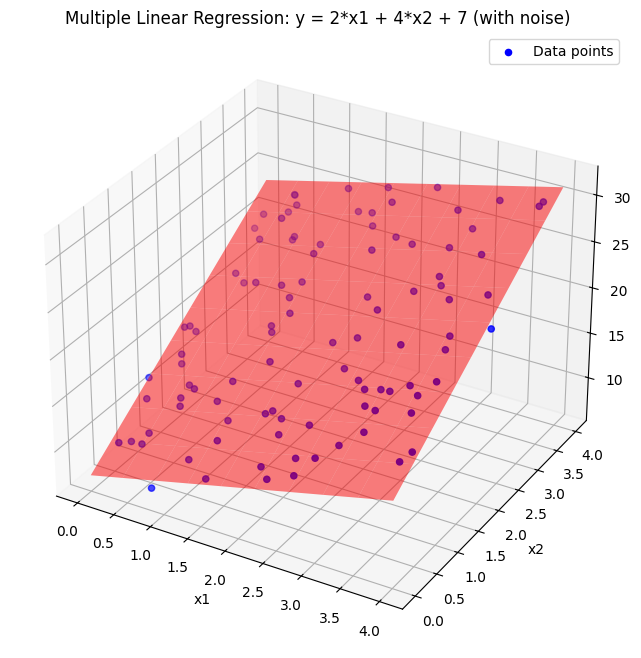

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate random sample points within the rectangle [0, 4] for both x1 and x2
x1 = np.random.uniform(0, 4, n_samples)
x2 = np.random.uniform(0, 4, n_samples)

X = np.column_stack((x1, x2))

# Compute the true target values using the given linear function: y = 2*x1 + 4*x2 + 7
y_true = 2 * x1 + 4 * x2 + 7

# Add some Gaussian noise to simulate measurement error
noise = np.random.normal(0, 1, n_samples) # standard deviation of 1
y = y_true + noise

# Fit a multiple linear regression model using scikit-learn
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Output the estimated parameters
print("Estimated coefficients (should be close to [2, 4]):", model.coef_)
print("Estimated intercept (should be close to 7):", model.intercept_)

# Compute the Sum of Squared Errors (SSE)
SSE_error = np.sum((y - y_pred)**2)
print("Sum of Squared Errors (SSE):", SSE_error)

# Plotting the data points and the regression plane in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='blue', label='Data points')

# Create a grid for plotting the regression plane
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 4, 10), np.linspace(0, 4, 10))
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Multiple Linear Regression: y = 2*x1 + 4*x2 + 7 (with noise)")
ax.legend()
plt.show()